# Gradient Descent Algorithm

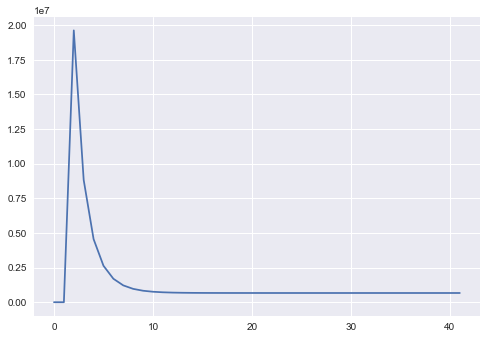

664885.3146226787


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def hypothesis(theta, x1, x2, x3, x4, x5):
    return theta[5]*x5 + theta[4]*x4 + theta[3]*x3 + theta[2]*x2 + theta[1]*x1 + theta[0]


def error(x, y, theta):
    
    total_error = 0
    
    for i in range (len(x1)):
        total_error += (hypothesis(theta, x[0][i], x[1][i], x[2][i], x[3][i], x[4][i]) - y[i])**2

    return total_error
        
        
def cal_gradient(x, y, theta):
    
    grad = np.zeros((6,))

    for i in range(len(y)):
        
        h = hypothesis(theta, x[0][i], x[1][i], x[2][i], x[3][i], x[4][i])
        grad[0] += (y[i] - h)
        grad[1] += (y[i] - h) * x[0][i]
        grad[2] += (y[i] - h) * x[1][i]
        grad[3] += (y[i] - h) * x[2][i]
        grad[4] += (y[i] - h) * x[3][i]
        grad[5] += (y[i] - h) * x[4][i]
    
    return grad


def gradientDescent(x, y):
    
    iterations = 200
    error_list = [0.01,0]
    theta_list = []
    theta = np.array([0, 0, 0, 0, 0, 0])
    change_error = 0.01
    
    while iterations > 0 and change_error >= 0.01:
        
        total_error = error(x, y, theta)
        error_list.append(total_error)
        
        grad = cal_gradient(x, y, theta)
        
        theta = theta + 0.001 * grad
        theta_list.append(theta)
        
        change_error = abs(error_list[-2] - error_list[-1])
        iterations -=1
    
    return theta, error_list, theta_list
  

f = pd.read_csv('Train.csv')

x1 = f["feature_1"]
x2 = f["feature_2"]
x3 = f["feature_3"]
x4 = f["feature_4"]
x5 = f["feature_5"]

y = f["target"]

x1 = x1.values.reshape((-1,))
x2 = x2.values.reshape((-1,))
x3 = x3.values.reshape((-1,))
x4 = x4.values.reshape((-1,))
x5 = x5.values.reshape((-1,))

x = [x1, x2, x3, x4, x5]

y = y.values.reshape((-1,))

theta, error_list, theta_list = gradientDescent(x, y)

theta_list = np.array(theta_list)

plt.plot(error_list)
plt.style.use('seaborn')
plt.show()

print(error_list[-1])

## Equation of hypothesis

In [26]:
print("Y = %0.2f*X5 + %0.2f*X4 + %0.2f*X3 + %0.2f*X2 + %0.2f*X1 +%0.2f" %(theta[5], theta[4], theta[3], theta[2], theta[1], theta[0]))

Y = 2.52*X5 + 44.77*X4 + 8.28*X3 + 92.66*X2 + 29.68*X1 +4.99


## Score

In [30]:
score = []

ya = np.mean(y)

for i in range(len(y)):
    
    h = hypothesis(theta, x[0][i], x[1][i], x[2][i], x[3][i], x[4][i])
    
    r_square = 1 - ((y[i]-h)/(y[i]-ya))**2
    
    score.append(r_square)
    
average_score = np.mean(score)   
print(average_score)


-34.70550843602186


## Testing Score

In [22]:
f = pd.read_csv('Test.csv')

x1 = f["feature_1"]
x2 = f["feature_2"]
x3 = f["feature_3"]
x4 = f["feature_4"]
x5 = f["feature_5"]

y = f["target"]

x1 = x1.values.reshape((-1,))
x2 = x2.values.reshape((-1,))
x3 = x3.values.reshape((-1,))
x4 = x4.values.reshape((-1,))
x5 = x5.values.reshape((-1,))

err = []

for i in range (len(y)):
    
    yp = theta[5]*x5[i] + theta[4]*x4[i] + theta[3]*x3[i] + theta[2]*x2[i] + theta[1]*x1[i] + theta[0]

    err.append((y[i] - yp)**2)
    
print("average error is %0.2f"%np.mean(err))    

average error is 400.92


# Stochastic Gradient Descent

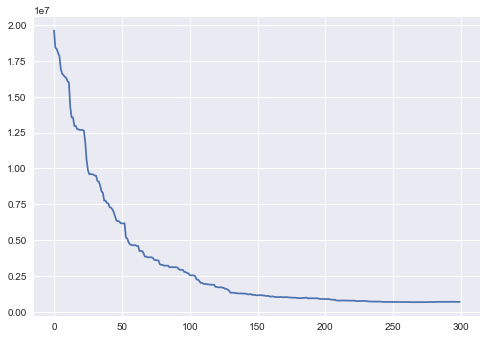

712244.919399234


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def hypothesis(theta, x1, x2, x3, x4, x5):
    return theta[5] * x5 + theta[4] * x4 + theta[3] * x3 + theta[2] * x2 + theta[1] * x1 + theta[0]


def error(x, y, theta):
    
    total_error = 0
    
    for i in range (len(x1)):
        
        h = hypothesis(theta, x[0][i], x[1][i], x[2][i], x[3][i], x[4][i])
        total_error += (h - y[i])**2

    return total_error
        
        
def cal_gradient(x, y, theta):
    
    grad = np.zeros((6,))
    indices = np.arange(y.shape[0])
    np.random.shuffle(indices)
    indices = indices[:1]

    for i in indices:
        
        h = hypothesis(theta, x[0][i], x[1][i], x[2][i], x[3][i], x[4][i])
        grad[0] += (y[i] - h)
        grad[1] += (y[i] - h) * x[0][i]
        grad[2] += (y[i] - h) * x[1][i]
        grad[3] += (y[i] - h) * x[2][i]
        grad[4] += (y[i] - h) * x[3][i]
        grad[5] += (y[i] - h) * x[4][i]
    
    return grad


def gradientDescent(x, y):
    
    iterations = 300
    error_list = []
    theta_list = []
    theta = np.array([0, 0, 0, 0, 0, 0])
    
    while iterations > 0:
        
        total_error = error(x, y, theta)
        error_list.append(total_error)
        grad = cal_gradient(x, y, theta)
        
        theta = theta + 0.01 * grad
        theta_list.append(theta)
        
        iterations -=1
    
    return theta, error_list, theta_list 


f = pd.read_csv('Train.csv')

x1 = f["feature_1"]
x2 = f["feature_2"]
x3 = f["feature_3"]
x4 = f["feature_4"]
x5 = f["feature_5"]

y = f["target"]

x1 = x1.values.reshape((-1,))
x2 = x2.values.reshape((-1,))
x3 = x3.values.reshape((-1,))
x4 = x4.values.reshape((-1,))
x5 = x5.values.reshape((-1,))

x = [x1, x2, x3, x4, x5]

y = y.values.reshape((-1,))

theta, error_list, theta_list = gradientDescent(x, y)

theta_list = np.array(theta_list)

plt.plot(error_list)
plt.style.use('seaborn')
plt.show()

print(error_list[-1])

## Equation of hypothesis

In [55]:
print("Y = %0.2f*X5 + %0.2f*X4 + %0.2f*X3 + %0.2f*X2 + %0.2f*X1 +%0.2f" %(theta[5], theta[4], theta[3], theta[2], theta[1], theta[0]))

Y = 3.72*X5 + 41.20*X4 + 10.30*X3 + 90.53*X2 + 27.67*X1 +5.37


## Testing score

In [56]:
score = []

ya = np.mean(y)

for i in range(len(y)):
    
    yp = theta[5]*x5[i] + theta[4]*x4[i] + theta[3]*x3[i] + theta[2]*x2[i] + theta[1]*x1[i] + theta[0]
    
    r_square = 1 - ((y[i]-yp)/(y[i]-ya))**2
    
    score.append(r_square)
    
average_score = np.mean(score)  
print(average_score)


-53.47885483045537


## Testing

In [53]:
f = pd.read_csv('Test.csv')

x1 = f["feature_1"]
x2 = f["feature_2"]
x3 = f["feature_3"]
x4 = f["feature_4"]
x5 = f["feature_5"]

y = f["target"]

x1 = x1.values.reshape((-1,))
x2 = x2.values.reshape((-1,))
x3 = x3.values.reshape((-1,))
x4 = x4.values.reshape((-1,))
x5 = x5.values.reshape((-1,))

x = [x1, x2, x3, x4, x5]

err = []

for i in range (len(y)):
    
    yp = theta[5]*x5[i] + theta[4]*x4[i] + theta[3]*x3[i] + theta[2]*x2[i] + theta[1]*x1[i] + theta[0]

    err.append((y[i] - yp)**2)
    
print("average error is %0.2f"%np.mean(err))    

average error is 427.30


# The average error of normal Gradient Descent algorithm is less than Batch Gradient descent algorithm, hence normal descent algorithm is better.